In [1]:
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


# **Read File**

In [3]:
import os
os.listdir()


['.config', 'Online Retail.xlsx', 'sample_data']

In [4]:
!file 'Online Retail.xlsx'


Online Retail.xlsx: Microsoft Excel 2007+


In [5]:
from google.colab import files
uploaded = files.upload()


Saving Online Retail.xlsx to Online Retail.xlsx


In [7]:
df = pd.read_excel('Online Retail.xlsx')
df.head(20)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# **Data Preprocessing**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


# **Clean the dataset**

In [13]:
df = df.dropna(subset=['CustomerID'])
df = df.dropna(subset=['Description'])

# Convert CustomerID to string
df['CustomerID'] = df['CustomerID'].astype(str)
# Remove canceled orders
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

df.shape


(397924, 8)

# **Feature Engineering (RFM Calculation)**

In [20]:
# Set reference date (usually one day after the last invoice date)
ref_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                             # Frequency
    'TotalPrice': lambda x: x.sum()                      # Monetary
}).reset_index()


rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


# **Score each metric**

In [22]:
# Calculate quantiles for numerical columns only
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75])
quantiles

# Functions to score each column
def r_score(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.50]:
        return 3
    elif x <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1

def fm_score(x, column):
    if x <= quantiles[column][0.25]:
        return 1
    elif x <= quantiles[column][0.50]:
        return 2
    elif x <= quantiles[column][0.75]:
        return 3
    else:
        return 4

# Apply scores
rfm['R'] = rfm['Recency'].apply(r_score)
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

# Combine scores
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,114
1,12347.0,2,7,4310.00,4,4,4,444
2,12348.0,75,4,1797.24,2,3,4,234
3,12349.0,19,1,1757.55,3,1,4,314
4,12350.0,310,1,334.40,1,1,2,112


# **Define segments based on RFM Score**

In [23]:
def segment(row):
    if row['RFM_Score'] == '444':
        return 'Best Customers'
    elif row['R'] == 4:
        return 'Loyal Customers'
    elif row['F'] == 4:
        return 'Frequent Buyers'
    elif row['M'] == 4:
        return 'Big Spenders'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment, axis=1)

rfm['Segment'].value_counts()


,count
Segment,
Others,2605
Loyal Customers,664
Best Customers,462
Frequent Buyers,343
Big Spenders,265


## **Visualize Segments**

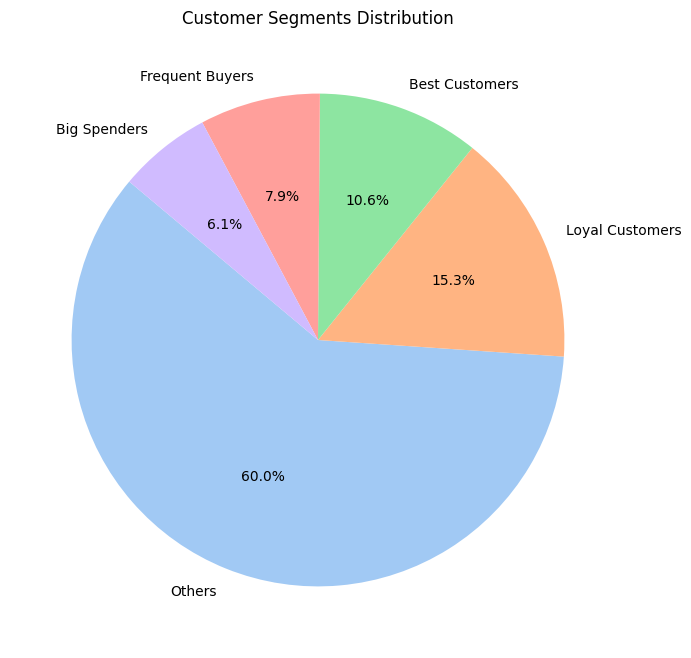

In [25]:
# Pie chart of segment distribution
plt.figure(figsize=(8, 8))
rfm['Segment'].value_counts().plot(kind='pie',
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   colors=sns.color_palette('pastel'))
plt.title('Customer Segments Distribution')
plt.ylabel('')
plt.show()


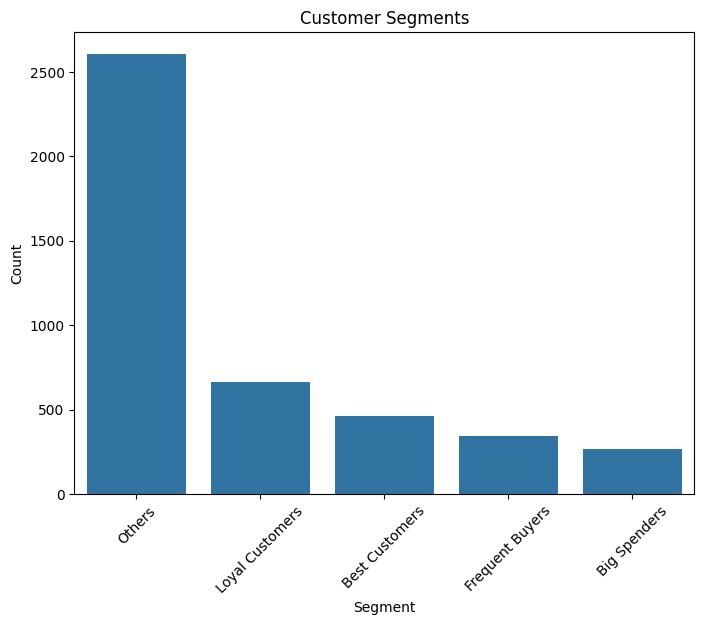

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

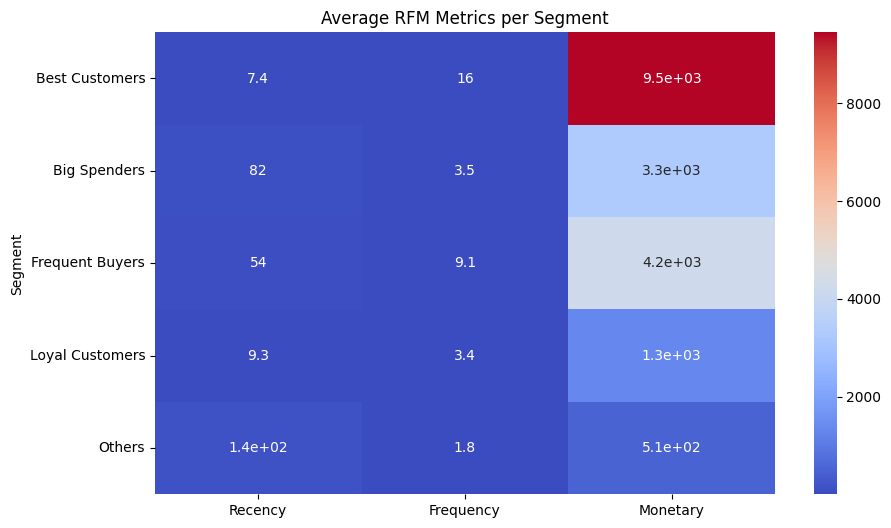

In [27]:
# Prepare data for heatmap
segment_avg = rfm.groupby('Segment').mean(numeric_only=True)[['Recency', 'Frequency', 'Monetary']]

plt.figure(figsize=(10,6))
sns.heatmap(segment_avg, annot=True, cmap='coolwarm')
plt.title('Average RFM Metrics per Segment')
plt.show()


# **Marketing Ideas per Segment**

| Segment          | Recommendation                                                                                |
| ---------------- | --------------------------------------------------------------------------------------------- |
| Others (largest) | Run re-engagement email campaigns with limited-time offers. Understand why they are inactive. |
| Loyal Customers  | Launch loyalty rewards and personalized experiences to increase lifetime value.               |
| Best Customers   | Create VIP programs, give early access to sales, send personal thank-you notes.               |
| Frequent Buyers  | Encourage them to purchase higher-value items via bundles or premium suggestions.             |
| Big Spenders     | Offer premium experiences, exclusive services, and nurture relationships personally.          |


# **In this RFM analysis**
I successfully segmented the customer base of the Online Retail dataset into five distinct groups:

Best Customers (462): These are the most engaged and highest-spending customers. They should be nurtured through VIP programs, personalized offers, and early access to products to strengthen loyalty.

Loyal Customers (664): Frequent and recent buyers who may not always spend the most per transaction. Encouraging them with loyalty rewards and personalized recommendations can further increase their value.

Frequent Buyers (343): Customers who buy often but tend to spend less. Marketing efforts such as product bundles and upselling can help increase their average purchase value.

Big Spenders (265): Customers who spend a lot but may not buy frequently. Exclusive premium offers and personal engagement can help convert them into loyal, repeat buyers.

Others (2605): The largest segment, consisting of less engaged customers. Re-engagement campaigns, special offers, and feedback collection will be key strategies to bring them back.